# Tiền xử lý dữ liệu cho các thuộc tính môi trường chính

- Notebook này tập trung vào việc tiền xử lý và khám phá các thuộc tính quan trọng từ một tập dữ liệu chứa dữ liệu môi trường toàn cầu. Mục tiêu là làm sạch và hiểu rõ tập dữ liệu để hỗ trợ các phân tích và mô hình hóa ý nghĩa sau này.

# Mục tiêu

- Mục tiêu của chúng ta là lọc và phân tích một tập hợp các thuộc tính môi trường được chọn trong khoảng thời gian từ năm 2010 đến 2022. Chúng ta sẽ tập trung vào các thuộc tính cung cấp cái nhìn sâu sắc về phát thải khí nhà kính, sử dụng năng lượng và ảnh hưởng của chúng đến biến đổi khí hậu.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('Set2')
%matplotlib inline


In [ ]:
data_file = 'full_data.csv'
df = pd.read_csv(data_file)

df.head()


,Country,Year,CO2_pc,CO2_share,GHG_annual,CO2_cumulative,N2O_annual,CH4_annual,CO2_coal,CO2_oil,CO2_gas,CO2_flaring,CO2_transport
0,Afghanistan,2010,0.296733,0.025115,31517414.0,103516320,4313534.5,17632924.0,2246032.0,5833088.0,271136.0,0.0,5540000.0
1,Afghanistan,2011,0.404740,0.034377,35598764.0,115354630,4477510.5,18206366.0,4180624.0,7335328.0,307776.0,0.0,6710000.0
2,Afghanistan,2012,0.329389,0.028725,33642076.0,125389950,4489223.0,18100962.0,3125392.0,6573216.0,307776.0,0.0,5850000.0
3,Afghanistan,2013,0.293283,0.026256,32901880.0,134640460,4488093.0,18211250.0,3326912.0,5591264.0,296784.0,0.0,4330000.0
4,Afghanistan,2014,0.280299,0.025856,33513274.0,143810770,4753052.0,18687494.0,3705783.0,5164638.0,271244.0,0.0,3530000.0


## Giải thích Các Thuộc tính Được Chọn

Các thuộc tính sau đây được chọn để phân tích chi tiết do tầm quan trọng của chúng trong các nghiên cứu môi trường:

- **Country**: Xác định quốc gia mà dữ liệu thuộc về, giúp so sánh theo địa lý.
- **Year**: Cung cấp năm của dữ liệu ghi nhận, quan trọng cho phân tích theo thời gian và xác định xu hướng.
- **CO2_pc**: Đo lường lượng phát thải CO₂ trên đầu người, cung cấp cái nhìn về đóng góp cá nhân vào phát thải khí nhà kính.
- **CO2_share**: Tỷ lệ phát thải CO₂ toàn cầu, thể hiện đóng góp của mỗi quốc gia vào tổng phát thải toàn cầu.
- **GHG_annual**: Phát thải khí nhà kính hàng năm, bao gồm nhiều loại khí khác nhau.
- **CO2_cumulative**: Phát thải CO₂ tích lũy, tổng lượng CO₂ đã được phát thải trong một khoảng thời gian.
- **N2O_annual**: Phát thải nitrous oxide hàng năm, một loại khí nhà kính mạnh.
- **CH4_annual**: Phát thải methane hàng năm, một loại khí nhà kính mạnh hơn CO₂ về khả năng giữ nhiệt.
- **CO2_coal**: Phát thải CO₂ từ than đá, một nguồn phát thải quan trọng.
- **CO2_oil**: Phát thải CO₂ từ dầu mỏ, một nguồn năng lượng chính ảnh hưởng đến mức phát thải toàn cầu.
- **CO2_gas**: Phát thải CO₂ từ khí đốt tự nhiên, một nguồn năng lượng quan trọng trong cơ cấu năng lượng.
- **CO2_flaring**: Phát thải CO₂ từ đốt cháy khí thải, thường liên quan đến ngành công nghiệp dầu khí.
- **CO2_transport**: Phát thải CO₂ từ vận tải, một nguồn phát thải đáng kể trong giao thông.

Các thuộc tính này quan trọng để hiểu các yếu tố liên quan đến môi trường và khí hậu mà chúng ta sẽ khám phá sâu hơn.


In [ ]:
# Lọc DataFrame danh sách các thuộc tính quan trọng
important_attributes = [
    "Country", "Year", "CO2_pc", "CO2_share", "GHG_annual", "CO2_cumulative",
    "N2O_annual", "CH4_annual", "CO2_coal", "CO2_oil", "CO2_gas",
    "CO2_flaring", "CO2_transport"
]

df_filtered = df[important_attributes]

df_filtered.head()


,Country,Year,CO2_pc,CO2_share,GHG_annual,CO2_cumulative,N2O_annual,CH4_annual,CO2_coal,CO2_oil,CO2_gas,CO2_flaring,CO2_transport
0,Afghanistan,2010,0.296733,0.025115,31517414.0,103516320,4313534.5,17632924.0,2246032.0,5833088.0,271136.0,0.0,5540000.0
1,Afghanistan,2011,0.404740,0.034377,35598764.0,115354630,4477510.5,18206366.0,4180624.0,7335328.0,307776.0,0.0,6710000.0
2,Afghanistan,2012,0.329389,0.028725,33642076.0,125389950,4489223.0,18100962.0,3125392.0,6573216.0,307776.0,0.0,5850000.0
3,Afghanistan,2013,0.293283,0.026256,32901880.0,134640460,4488093.0,18211250.0,3326912.0,5591264.0,296784.0,0.0,4330000.0
4,Afghanistan,2014,0.280299,0.025856,33513274.0,143810770,4753052.0,18687494.0,3705783.0,5164638.0,271244.0,0.0,3530000.0


## Khám phá Dữ liệu - Tổng quan Ban đầu

Chúng ta sẽ khám phá dữ liệu đã lọc để hiểu cấu trúc của nó, xác định bất kỳ vấn đề tiềm ẩn về giá trị thiếu hoặc không phù hợp, và xem xét phân phối của các thuộc tính đã chọn.


In [ ]:
print("Kích thước Dữ liệu:", df_filtered.shape)

print("\nCác Cột và Kiểu Dữ liệu:")
print(df_filtered.dtypes)


Kích thước Dữ liệu: (2795, 13)

Các Cột và Kiểu Dữ liệu:
Country            object
Year                int64
CO2_pc            float64
CO2_share         float64
GHG_annual        float64
CO2_cumulative      int64
N2O_annual        float64
CH4_annual        float64
CO2_coal          float64
CO2_oil           float64
CO2_gas           float64
CO2_flaring       float64
CO2_transport     float64
dtype: object


In [ ]:
df_filtered.describe(include='all')

,Country,Year,CO2_pc,CO2_share,GHG_annual,CO2_cumulative,N2O_annual,CH4_annual,CO2_coal,CO2_oil,CO2_gas,CO2_flaring,CO2_transport
count,2795,2795.000000,2795.000000,2795.000000,2.561000e+03,2.795000e+03,2.626000e+03,2.561000e+03,2.795000e+03,2.795000e+03,2.795000e+03,2.795000e+03,2.110000e+03
unique,215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2016.000000,4.911124,0.915746,5.286502e+08,1.429825e+10,2.794877e+07,1.011046e+08,1.365856e+08,1.039159e+08,6.545366e+07,3.605686e+06,7.280577e+07
std,NaN,3.742327,5.982110,7.144830,3.829378e+09,1.106570e+11,2.018977e+08,7.214271e+08,1.125486e+09,8.180975e+08,4.948946e+08,2.711570e+07,5.626168e+08
min,NaN,2010.000000,0.024414,0.000011,6.796008e+03,1.685440e+05,0.000000e+00,1.254333e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,2013.000000,0.881442,0.003672,9.360956e+06,3.973547e+07,4.450203e+05,2.382656e+06,0.000000e+00,9.178320e+05,0.000000e+00,0.000000e+00,8.300000e+05
50%,NaN,2016.000000,2.974252,0.025663,4.628902e+07,3.212952e+08,3.164749e+06,1.237496e+07,1.868640e+05,5.103753e+06,2.455690e+05,0.000000e+00,3.775000e+06
75%,NaN,2019.000000,6.586213,0.162621,1.396886e+08,2.769822e+09,1.025955e+07,3.773582e+07,6.705120e+06,2.405906e+07,1.549598e+07,5.449020e+05,1.624500e+07


## Xử lý Giá trị Thiếu và Kiểu Dữ liệu

Chúng ta sẽ kiểm tra các giá trị thiếu trong tất cả các cột và kiểm tra kiểu dữ liệu của chúng. Bất kỳ sự không nhất quán hoặc giá trị thiếu nào sẽ được xử lý thông qua việc điền giá trị trung vị hoặc biến đổi dữ liệu khi cần thiết.

Giá trị Thiếu trong Mỗi Cột:
 Country             0
Year                0
CO2_pc              0
CO2_share           0
GHG_annual        234
CO2_cumulative      0
N2O_annual        169
CH4_annual        234
CO2_coal            0
CO2_oil             0
CO2_gas             0
CO2_flaring         0
CO2_transport     685
dtype: int64


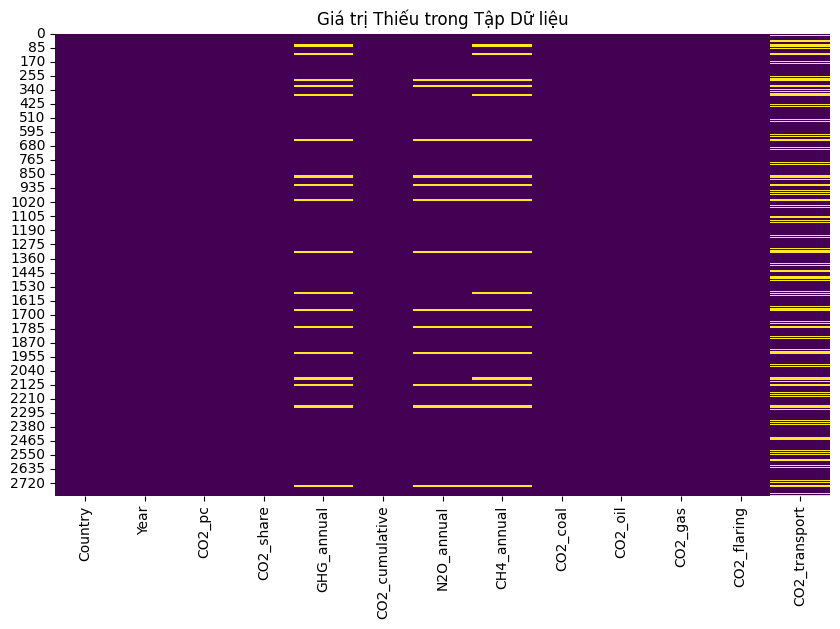

Kiểu Dữ liệu Sau Khi Làm Sạch:
Country            object
Year                int64
CO2_pc            float64
CO2_share         float64
GHG_annual        float64
CO2_cumulative      int64
N2O_annual        float64
CH4_annual        float64
CO2_coal          float64
CO2_oil           float64
CO2_gas           float64
CO2_flaring       float64
CO2_transport     float64
dtype: object

Giá trị Thiếu Sau Khi Làm Sạch:
 Country           0
Year              0
CO2_pc            0
CO2_share         0
GHG_annual        0
CO2_cumulative    0
N2O_annual        0
CH4_annual        0
CO2_coal          0
CO2_oil           0
CO2_gas           0
CO2_flaring       0
CO2_transport     0
dtype: int64


In [ ]:
missing_values = df_filtered.isnull().sum()
print("Giá trị Thiếu trong Mỗi Cột:\n", missing_values)

# Trực quan hóa giá trị thiếu
plt.figure(figsize=(10, 6))
sns.heatmap(df_filtered.isnull(), cbar=False, cmap='viridis')
plt.title("Giá trị Thiếu trong Tập Dữ liệu")
plt.show()

df_cleaned = df_filtered.copy()

# Điền giá trị thiếu dựa trên loại cột
for attr in important_attributes[2:]:
    if df_cleaned[attr].isnull().sum() > 0:
        df_cleaned[attr] = df_cleaned[attr].fillna(df_cleaned[attr].median())

df_cleaned['Year'] = df_cleaned['Year'].astype(int)

print("Kiểu Dữ liệu Sau Khi Làm Sạch:")
print(df_cleaned.dtypes)

print("\nGiá trị Thiếu Sau Khi Làm Sạch:\n", df_cleaned.isnull().sum())


## Phân phối và Trực quan hóa Các Cột

Để hiểu dữ liệu tốt hơn, chúng ta sẽ trực quan hóa phân phối của mỗi thuộc tính quan trọng. Điều này giúp xác định các mẫu, độ lệch và giá trị ngoại lai tiềm năng.

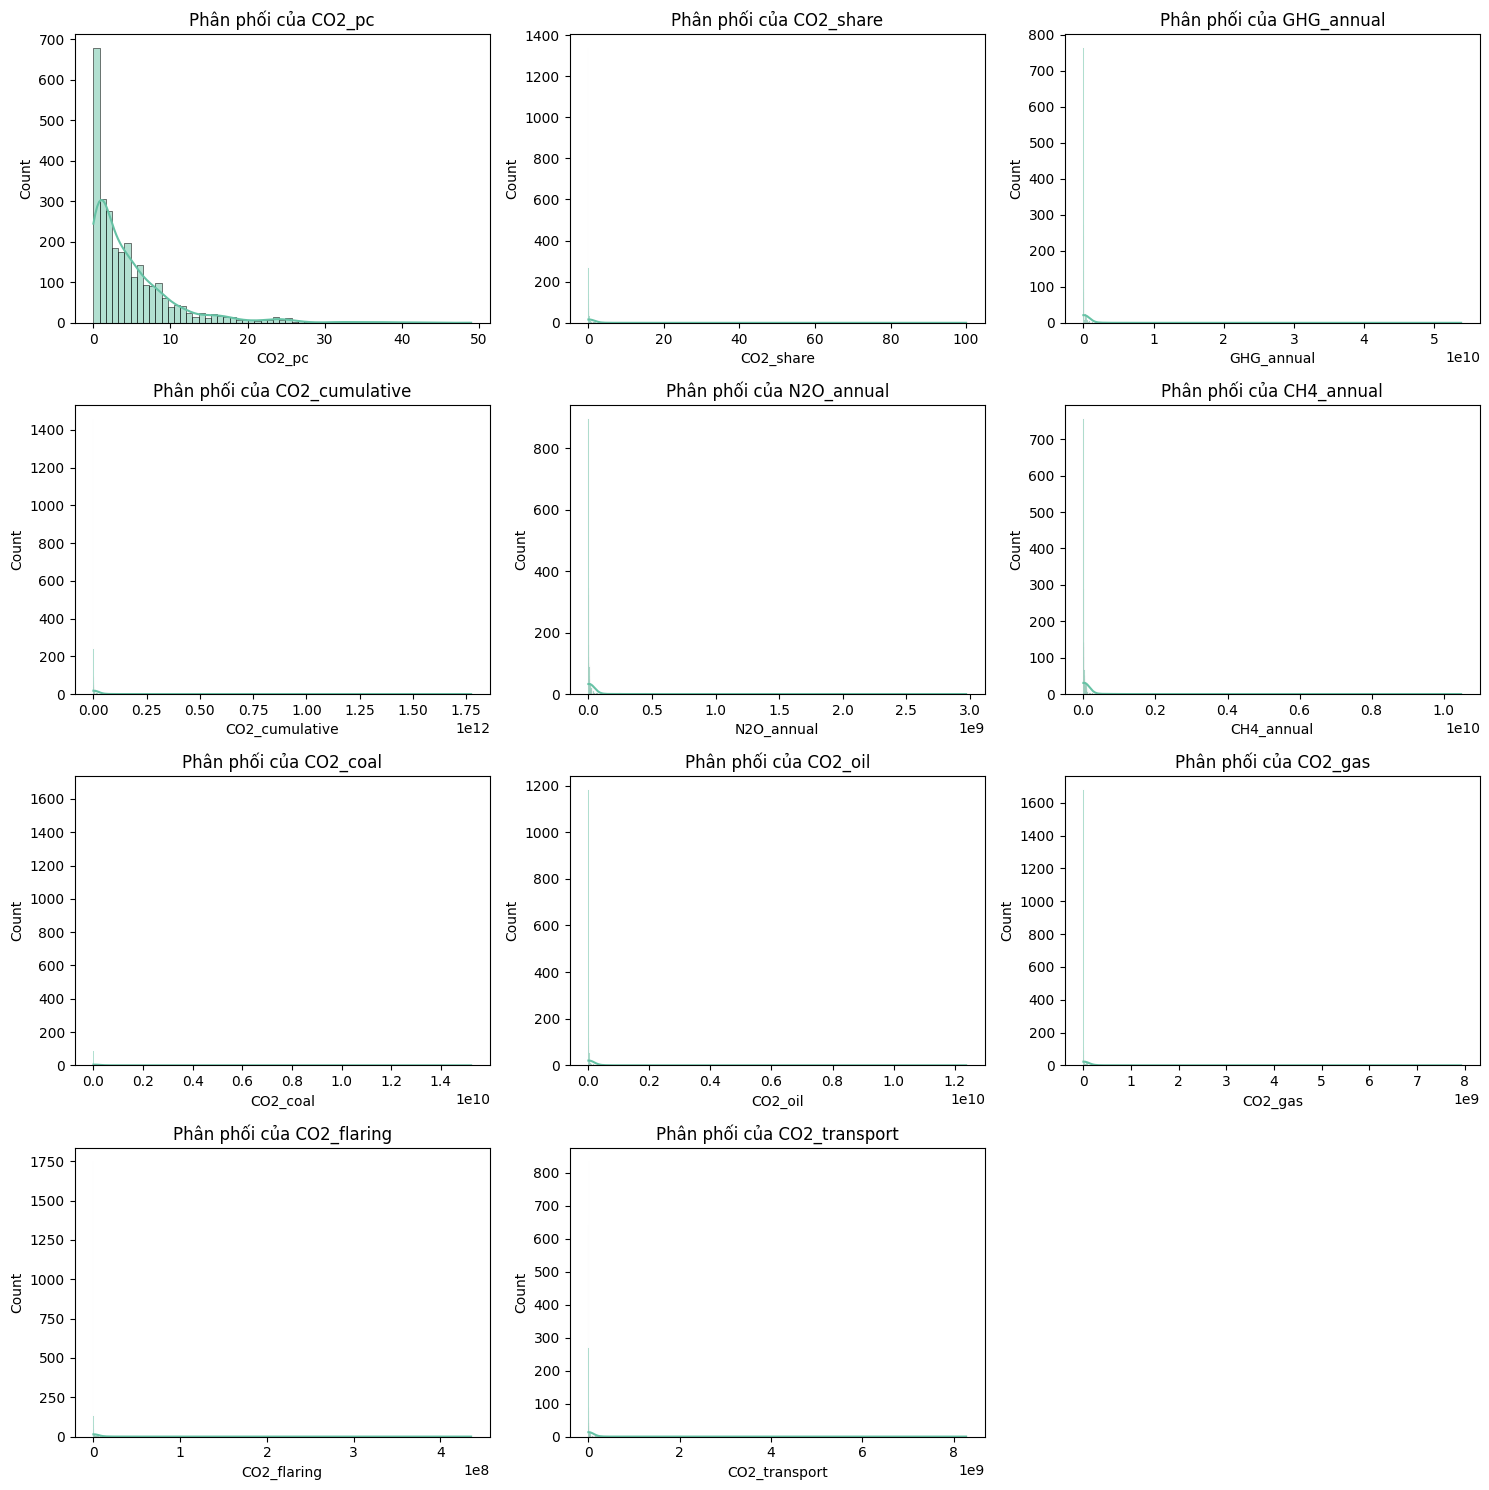

In [ ]:
# Trực quan hóa phân phối mỗi thuộc tính
plt.figure(figsize=(15, 15))
for i, attr in enumerate(important_attributes[2:]):
    plt.subplot(4, 3, i+1)
    sns.histplot(df_cleaned[attr], kde=True)
    plt.title(f'Phân phối của {attr}')
    plt.xlabel(attr)
plt.tight_layout()
plt.show()

# Giải thích:
Các biểu đồ histogram hiển thị phân phối của từng biến. Hầu hết các thuộc tính như 'CO2_pc', 'CO2_share', và 'GHG_annual' có độ lệch cao với đuôi dài, cho thấy hầu hết các điểm dữ liệu tập trung ở mức thấp với một số ngoại lai cực đoan.

## Ma trận Tương Quan và Phân tích Bivariate

Khám phá tương quan giữa các thuộc tính là quan trọng để hiểu cách chúng liên quan với nhau. Chúng ta sẽ tạo ma trận tương quan để phân tích những mối quan hệ này.

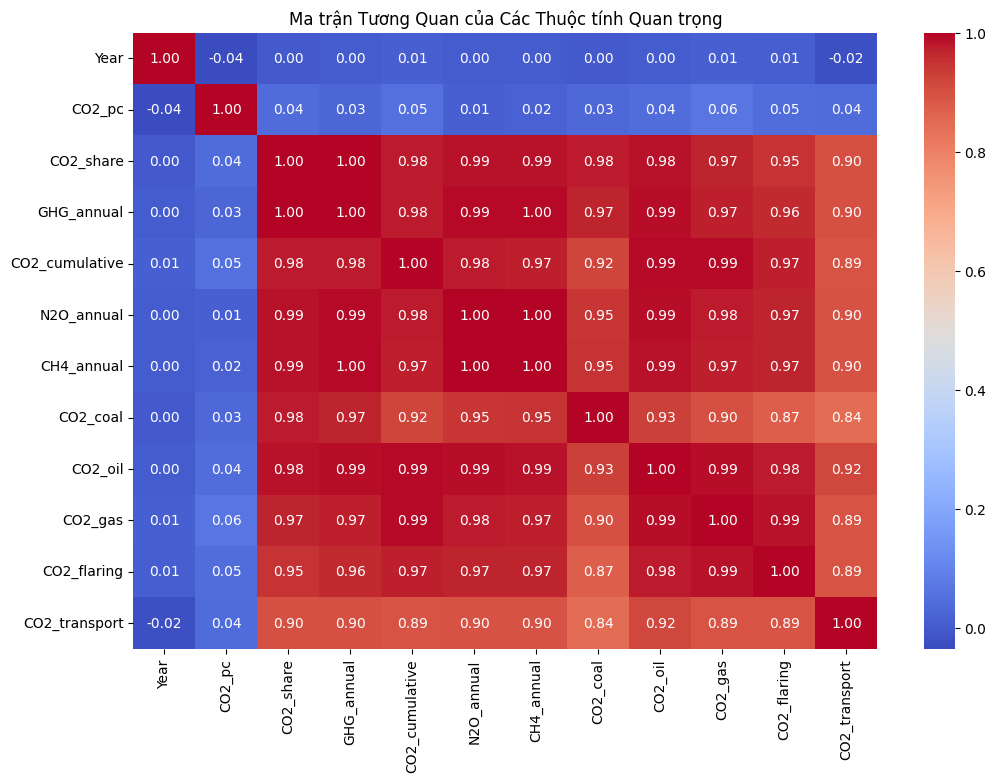

In [ ]:
numeric_df = df_cleaned.select_dtypes(include='number')

correlation_matrix = numeric_df.corr()

# Trực quan hóa ma trận tương quan
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Ma trận Tương Quan của Các Thuộc tính Quan trọng")
plt.show()

# Giải thích:
- Ma trận tương quan cho thấy mối quan hệ giữa các biến. Một số tương quan cao được quan sát như:
- 'CO2_pc' và 'CO2_share' (0.75), cho thấy mối quan hệ mạnh mẽ giữa phát thải CO2 trên đầu người và tỷ lệ phát thải toàn cầu.
- 'GHG_annual' có tương quan cao với các loại phát thải CO2 từ các nguồn như than đá, dầu mỏ, khí đốt (tất cả >0.70), ngụ ý rằng tổng phát thải khí nhà kính liên quan mật thiết với các nguồn phát thải CO2 cụ thể.

## Phát hiện và Xử lý Giá trị Ngoại lai

Giá trị ngoại lai có thể ảnh hưởng đáng kể đến hiệu suất của mô hình và độ chính xác của các phân tích. Chúng ta sẽ trực quan hóa các giá trị ngoại lai bằng các biểu đồ hộp và xem xét việc xử lý các giá trị cực đoan nếu cần thiết.

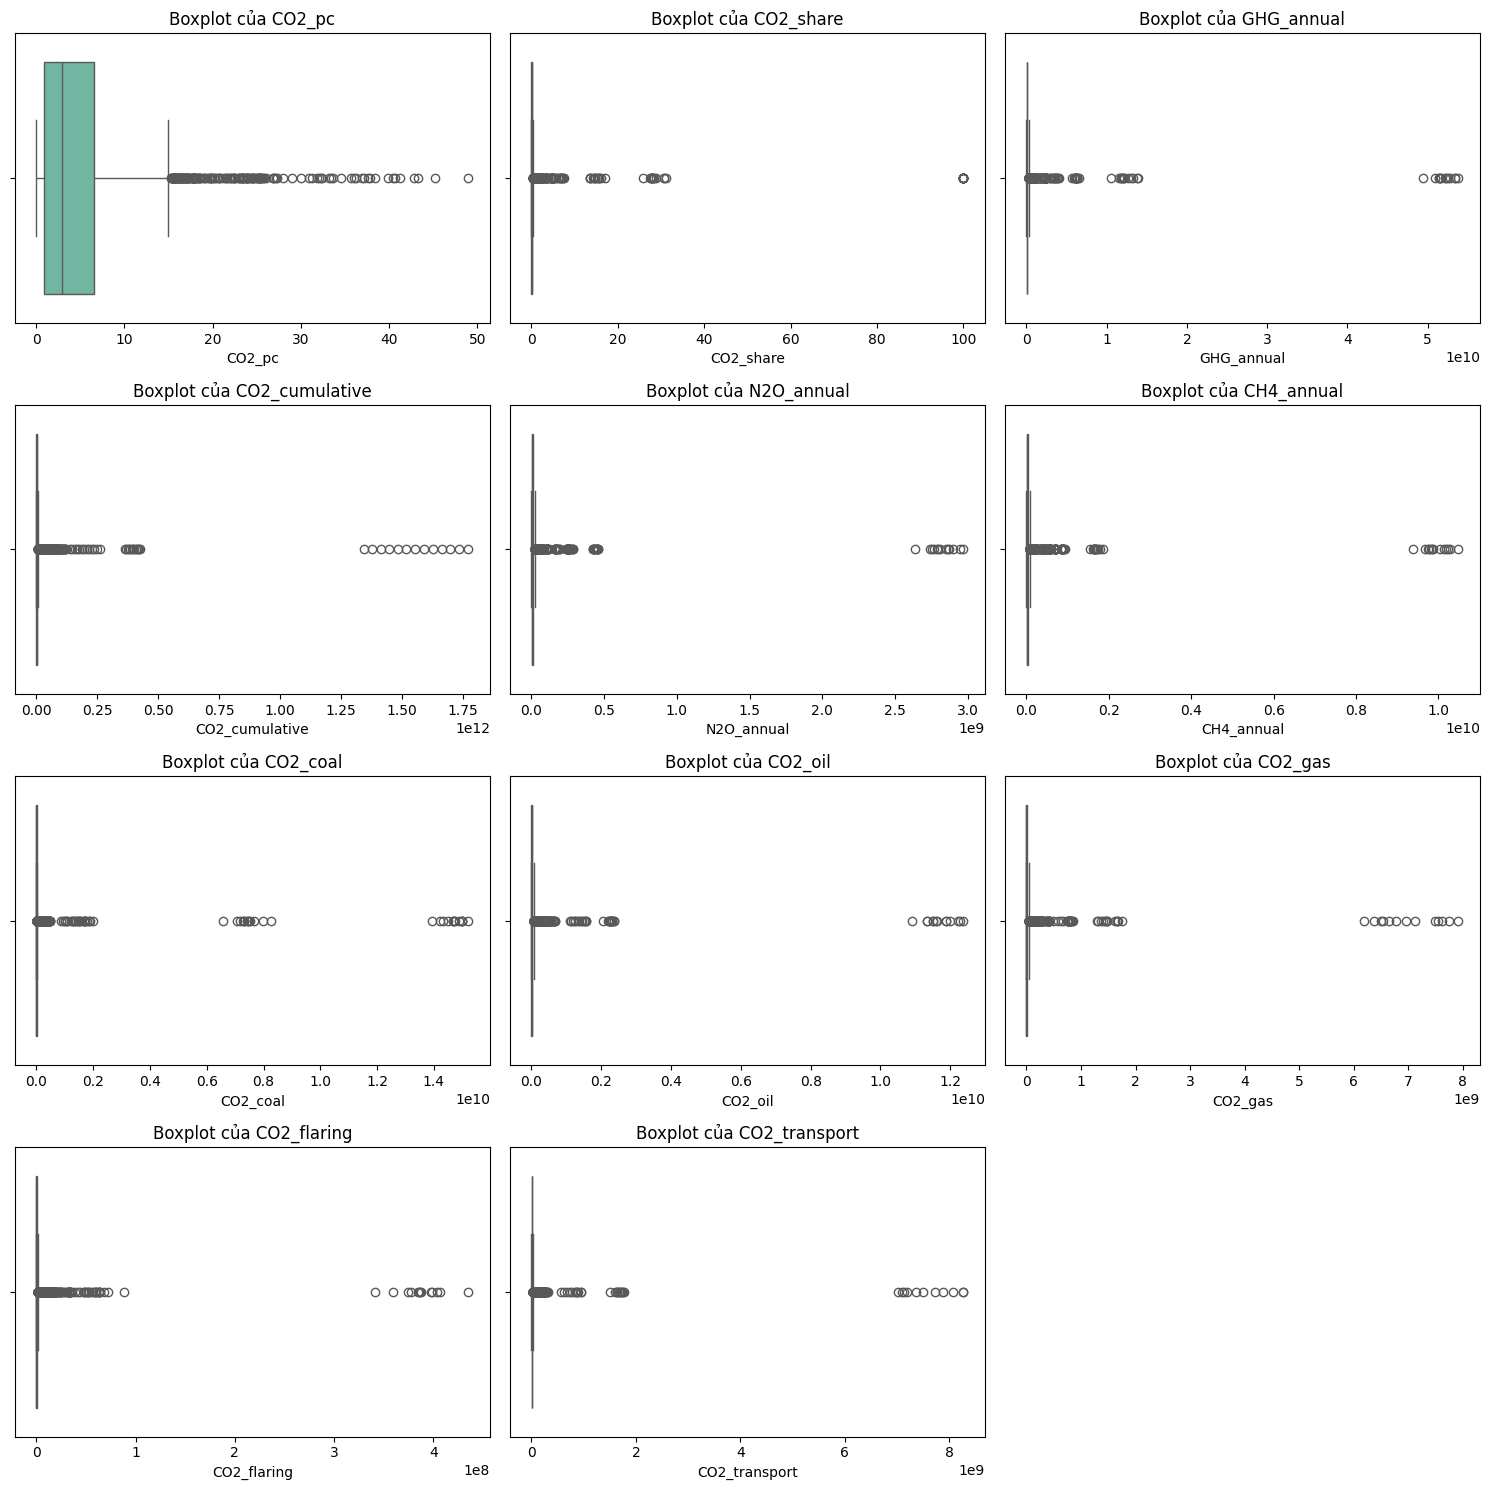

In [ ]:
# Trực quan hóa các giá trị ngoại lai
plt.figure(figsize=(15, 15))
for i, attr in enumerate(important_attributes[2:]):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=df_cleaned[attr])
    plt.title(f'Boxplot của {attr}')
plt.tight_layout()
plt.show()

# Giải thích:
- Các biểu đồ hộp cho thấy hầu hết các thuộc tính có một số lượng lớn các giá trị ngoại lai và độ lệch cao, với phần lớn dữ liệu tập trung ở mức thấp. Các quan sát chính:
- 'CO2_pc', 'CO2_share', và các biến phát thải từ các nguồn như 'CO2_coal', 'CO2_oil', 'CO2_gas' có các giá trị ngoại lai đáng kể, cho thấy một số quốc gia có mức phát thải rất cao.
- 'GHG_annual' và 'CO2_cumulative' cũng cho thấy độ lệch cao với một số giá trị cực đoan.

## Lưu Dữ liệu Đã Làm sạch

Sau khi dữ liệu đã được làm sạch và khám phá, chúng ta sẽ lưu nó vào một tệp CSV mới để sử dụng cho các bước mô hình hóa và phân tích tiếp theo.

In [ ]:
cleaned_csv_file = 'cleaned_data.csv'
df_cleaned.to_csv(cleaned_csv_file, index=False)
print(f'Dữ liệu đã làm sạch được lưu vào {cleaned_csv_file}')

Dữ liệu đã làm sạch được lưu vào cleaned_data.csv
